# My Notes - Tensorflow

We will be creating machine algorithm in Tensorflow

## Import the relevant libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [6]:
# First, we should declare a variable containing the size of the training set we want to generate
observations = 1000

# 2 variables from random uniform distribution
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

# Combine the two variables into one
generated_inputs = np.column_stack((xs, zs))

# We will add a random noise to the function i.e. f(x, z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1,1, (observations, 1))

# Produce that targets according to our f(x, z) = 2x - 3z + 5 + noise definition
# Weights are 2, -3, while the bias is 5
generated_targets = 2*xs - 3*zs + 5 + noise

# Save the file to npz file called "TF_nitro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [8]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')
training_data

NpzFile 'TF_intro.npz' with keys: inputs, targets

In [9]:
# Declare the variable where we will store the input size of our model
input_size = 2

# Declare the variable where we will store the output size of our model
output_size = 1

# Outline the model
# We layout the model 'Sequential'
# No calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # There are extra arguments we can include to customize our model
                                                 # in our case, we are just trying to create a solution that is as
                                                 # close as possible to our Numpy model
                                                 kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# We can definie a custom optimizer, where we can specify the learning_rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 'compile' is the place where we can select and indicate the optimizers and the loss
model.compile(optimizer = custom_optimizer, loss='mean_squared_error')

# Finally fit the model, indicating inputs and targets
# If they are not specified, the number of epochs (iteration over the full set of data) it will be 1 (a single epoch of training)
# Number of epochs is 'kind of' mandatory, too
# We can play around with the verbose, we prefer verbose = 2
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - 14ms/step - loss: 22.3885
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 1.2717
Epoch 3/100
32/32 - 0s - 2ms/step - loss: 0.4834
Epoch 4/100
32/32 - 0s - 2ms/step - loss: 0.3841
Epoch 5/100
32/32 - 0s - 2ms/step - loss: 0.4174
Epoch 6/100
32/32 - 0s - 2ms/step - loss: 0.4039
Epoch 7/100
32/32 - 0s - 2ms/step - loss: 0.3721
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.3890
Epoch 9/100
32/32 - 0s - 2ms/step - loss: 0.3992
Epoch 10/100
32/32 - 0s - 3ms/step - loss: 0.3939
Epoch 11/100
32/32 - 0s - 2ms/step - loss: 0.3731
Epoch 12/100
32/32 - 0s - 3ms/step - loss: 0.3917
Epoch 13/100
32/32 - 0s - 3ms/step - loss: 0.3544
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.3872
Epoch 15/100
32/32 - 0s - 2ms/step - loss: 0.3775
Epoch 16/100
32/32 - 0s - 2ms/step - loss: 0.3795
Epoch 17/100
32/32 - 0s - 3ms/step - loss: 0.3608
Epoch 18/100
32/32 - 0s - 3ms/step - loss: 0.3675
Epoch 19/100
32/32 - 0s - 3ms/step - loss: 0.3713
Epoch 20/100
32/32 - 0s - 2ms/step - loss: 0.4475
Epoch 2

## Extract the weights and bias

This is not essential step for machine learning, however, this will allows us to verify if the answers we got are correct.

In [11]:
model.layers[0].get_weights()

[array([[ 2.0546944],
        [-3.037561 ]], dtype=float32),
 array([4.9990044], dtype=float32)]

In [12]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0546944],
       [-3.037561 ]], dtype=float32)

In [13]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([4.9990044], dtype=float32)

## Extract the outputs (make predictions)

Once more, this is not an essential step, however, we usually want to be able to make predictions

In [15]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
model.predict_on_batch(training_data['inputs']).round(1)

array([[-22.1],
       [ 12.2],
       [  8.5],
       [-16.4],
       [ 22.9],
       [  6.7],
       [ 26. ],
       [-23.1],
       [ -2.5],
       [-24.3],
       [ 15.7],
       [-27.7],
       [  4.1],
       [ -1.5],
       [-20.4],
       [ -2.9],
       [ -4.2],
       [  5.2],
       [ 34. ],
       [ 34. ],
       [-31.1],
       [-15. ],
       [ 40.7],
       [-23. ],
       [-11.1],
       [  7.1],
       [ 25.5],
       [-15.5],
       [-13. ],
       [ 10.5],
       [ 11.7],
       [ 15.8],
       [-14.5],
       [-13.2],
       [ 16.7],
       [ 19.7],
       [-27.6],
       [  0.9],
       [  2.3],
       [ 17.9],
       [ 10.1],
       [ 46.5],
       [ 20. ],
       [-19.3],
       [  4.2],
       [-12.8],
       [-26.9],
       [ 15.7],
       [ -6.3],
       [ 34.1],
       [  7.6],
       [  1.4],
       [ 15.2],
       [ -6.5],
       [-34.2],
       [  6.3],
       [-36.4],
       [ 13.7],
       [-14.9],
       [  1.1],
       [ 27.8],
       [  9.5],
       [

In [16]:
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
training_data['targets'].round(1)

array([[-22.2],
       [ 11.7],
       [  8. ],
       [-16.4],
       [ 23.2],
       [  7.7],
       [ 25.3],
       [-22.7],
       [ -2.4],
       [-24. ],
       [ 14.5],
       [-28.2],
       [  3.5],
       [ -1.8],
       [-19.1],
       [ -2.9],
       [ -3.2],
       [  4.9],
       [ 33.1],
       [ 33.2],
       [-29.6],
       [-14.1],
       [ 40.9],
       [-22. ],
       [-10.1],
       [  6. ],
       [ 25.2],
       [-15.3],
       [-13.2],
       [  9.7],
       [ 11.8],
       [ 15.9],
       [-14.8],
       [-12.6],
       [ 16.9],
       [ 18.8],
       [-26.8],
       [  1. ],
       [  2.6],
       [ 18.1],
       [ 10.9],
       [ 46.5],
       [ 20.6],
       [-18.9],
       [  3.4],
       [-11.8],
       [-26.3],
       [ 16.4],
       [ -6.6],
       [ 33.4],
       [  7.9],
       [  1.6],
       [ 15.1],
       [ -7.1],
       [-33. ],
       [  5.2],
       [-35.3],
       [ 14.2],
       [-14.6],
       [  0.9],
       [ 27.8],
       [  9.8],
       [

## Plot the data

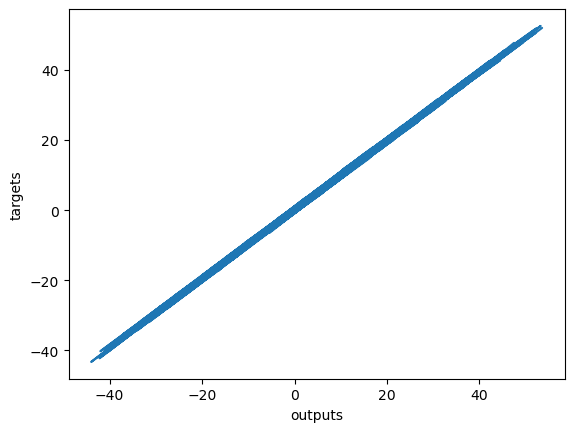

In [18]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order "to fit" them to what the plot function expects
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()